In [1]:
# %load fuquan_v1.py
##  PCA analysis
import os
import pandas as pd
from package_path_define.path_define import *
from package_readdata.read_data import find_stocks_in_date_range_fuquan
from package_readdata.read_data import read_vol_price_data_fuquan
from package_plot.plot_data import *
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
from numpy import arange
#print path_fuquan

def data_get(stock_full_path,files,file_num_in):
    df_m1 = pd.DataFrame() ## create a blank dataframe
    for num_in in file_num_in:
        file_in='\\'.join([stock_full_path,files[num_in]])
        #print file_in
        df1=read_vol_price_data_fuquan(file_in)
        df_m1=df_m1.append(df1,ignore_index=False)
        #print df1.head()
        #print len(df1)
    date1=df_m1.date.values
    years=[]
    months=[]
    for da in date1:
        year=da[0:4]
        month=da[5:7]
        years.append(int(year))
        months.append(int(month))
    df_m1['year']=years
    df_m1['month']=months
    return df_m1
#print main_path_data

the path define is in G:\stock\code\package_path_define


In [133]:
market='shenzhen'
path1='\\'.join([main_path_data,'fuquan_combine',market])

stock_index_file="shanghai_shenzhen_data_from_2013"
stock_path='\\'.join([main_path_data,stock_index_file,market])
sto2=os.listdir(stock_path)
#data_df1=data_get(stock_full_path,files,file_num_in)
import random
sample1=random.sample(sto2,300)
close1=[]
for s1 in sample1:
    stk_num=s1[0:6]
    #stock_in.append(stk_num)
    file_in1='%s_fuquan_all.csv' %stk_num
    file_in='\\'.join([path1,file_in1])
    try:
        df1=read_vol_price_data_fuquan(file_in)
        data_df1= df1.reset_index(drop=True)
        #df2=data_df1
        df2=data_df1.sort_values(by=['date'])
        df3=df2[(df2.date>='2016-01-01')&(df2.date<='2016-12-31')]
        close2=df3.close.values.tolist()
        close1.append(close2)
    except:
        pass

['002863.sz',
 '002585.sz',
 '002196.sz',
 '002658.sz',
 '002453.sz',
 '000949.sz',
 '002128.sz',
 '002850.sz',
 '002855.sz',
 '000858.sz',
 '002416.sz',
 '002623.sz',
 '002285.sz',
 '000687.sz',
 '002501.sz',
 '002792.sz',
 '002228.sz',
 '002531.sz',
 '002241.sz',
 '002553.sz',
 '002131.sz',
 '000637.sz',
 '002156.sz',
 '002455.sz',
 '000996.sz',
 '001896.sz',
 '002622.sz',
 '002687.sz',
 '000669.sz',
 '000829.sz',
 '002237.sz',
 '000939.sz',
 '002750.sz',
 '002347.sz',
 '000619.sz',
 '002510.sz',
 '002632.sz',
 '000417.sz',
 '002602.sz',
 '002291.sz',
 '000020.sz',
 '002523.sz',
 '000156.sz',
 '002061.sz',
 '002298.sz',
 '002150.sz',
 '000850.sz',
 '002813.sz',
 '000811.sz',
 '002137.sz',
 '002296.sz',
 '002029.sz',
 '000301.sz',
 '002288.sz',
 '000726.sz',
 '002215.sz',
 '002480.sz',
 '002134.sz',
 '000665.sz',
 '002568.sz',
 '000707.sz',
 '002031.sz',
 '002653.sz',
 '002370.sz',
 '000927.sz',
 '002735.sz',
 '000010.sz',
 '002778.sz',
 '002067.sz',
 '002113.sz',
 '002344.sz',
 '0022

In [115]:
len(close1)

244

In [118]:
from collections import Counter
len1=[]
for cl in close1:
    len1.append(len(cl))
coun1=Counter(len1)
print max(coun1)
print coun1[244]

244
134


In [123]:
import numpy as np
from matplotlib.mlab import PCA
data = np.array(close2)
data=data.T
print data.shape
results = PCA(data)
#print data
print results.fracs[0]
print results.fracs[1]


(244L, 134L)
0.471225210765
0.157450881675


In [107]:
results.Y

array([[ -3.04929633e+01,  -2.07379355e+00,   6.29318059e-02, ...,
         -4.41583064e-04,  -9.96654968e-04,  -3.04910562e-04],
       [ -9.56685677e+01,   2.51002901e+00,  -2.67933516e-01, ...,
          2.31538384e-05,  -5.99667865e-05,  -4.77219446e-05],
       [ -6.37953324e+00,  -6.82226515e-01,   4.03791952e-02, ...,
          1.32790116e-03,  -9.30656526e-04,  -2.37724066e-04],
       ..., 
       [ -1.14912440e+00,  -9.04100077e-02,   4.06833620e-03, ...,
          1.00910747e-03,  -1.66953036e-04,  -3.68317091e-03],
       [  1.96269172e+00,   9.24427040e-03,  -2.71304256e-02, ...,
         -9.01132743e-04,  -3.55410737e-04,   3.28696423e-05],
       [  3.12680145e+00,   1.56077165e-01,   6.71074613e-04, ...,
          2.73790556e-03,   6.45861229e-04,  -1.17100911e-03]])

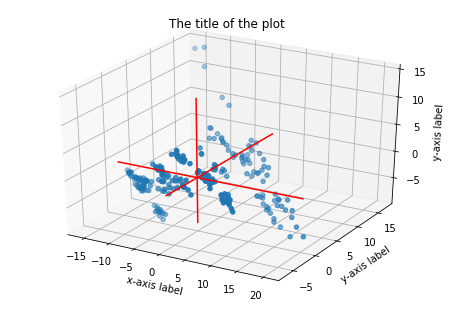

In [124]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = []
y = []
z = []
for item in results.Y:
    x.append(item[0])
    y.append(item[1])
    z.append(item[2])

plt.close('all') # close all latent plotting windows
fig1 = plt.figure() # Make a plotting figure
ax = Axes3D(fig1) # use the plotting figure to create a Axis3D object.
pltData = [x,y,z] 
ax.scatter(pltData[0], pltData[1], pltData[2], 'bo') # ma
# make simple, bare axis lines through space:
xAxisLine = ((min(pltData[0]), max(pltData[0])), (0, 0), (0,0)) # 2 points make the x-axis line at the data extrema along x-axis 
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r') # make a red line for the x-axis.
yAxisLine = ((0, 0), (min(pltData[1]), max(pltData[1])), (0,0)) # 2 points make the y-axis line at the data extrema along y-axis
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r') # make a red line for the y-axis.
zAxisLine = ((0, 0), (0,0), (min(pltData[2]), max(pltData[2]))) # 2 points make the z-axis line at the data extrema along z-axis
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r') # make a red line for the z-axis.
 
# label the axes 
ax.set_xlabel("x-axis label") 
ax.set_ylabel("y-axis label")
ax.set_zlabel("y-axis label")
ax.set_title("The title of the plot")
plt.show() # show the plot

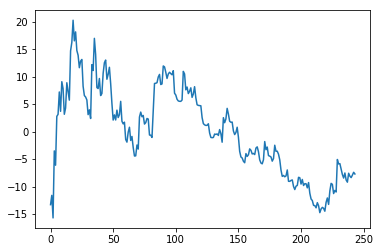

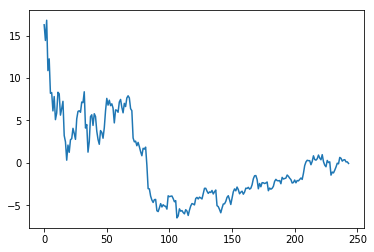

In [128]:
plt.plot(x)
plt.show()
plt.plot(y)
plt.show()

In [93]:
x

[-30.492963329474794,
 -95.668567701898468,
 -6.3795332410861008,
 1.6383072376779249,
 -9.5233794866288815,
 -2.7458573304490574,
 1.2476350551619579,
 0.65615556345960246,
 1.9780637148825286,
 -4.361010025213929,
 -2.4335022177616938,
 0.51982389431254861,
 2.8347490616626843,
 1.6891740158332202,
 1.2680365896186716,
 2.2211026200636104,
 -1.1564731839770452,
 1.7610218550820518,
 1.2504864913942761,
 0.1503124729050074,
 0.35547326480160996,
 0.16798312825549189,
 -4.8794044000573527,
 3.4428366303606541,
 -1.421378839950032,
 2.5790987125251448,
 0.84273624041786699,
 -7.3779846650595013,
 -6.1395285711528302,
 -3.4056859380182698,
 1.2783048016227798,
 3.5914062766872239,
 -4.9593931421184516,
 -4.8044558803445749,
 -4.7718356862930937,
 -4.4970359559858535,
 3.400987806511985,
 -5.0724028623505779,
 2.7518802229769084,
 -0.35919289070098492,
 2.3136567027358677,
 2.1112738299539595,
 2.7123473250410171,
 2.832368551668591,
 2.5371670685281731,
 1.9796373679951804,
 2.4385775592

In [80]:
data = np.array(np.random.randint(10,size=(10,3)))
print data.shape


(10L, 3L)


In [68]:
print data
results = PCA(data)
print results
print results.a
print results.Y

[[2 5 0]
 [3 0 3]
 [8 8 9]
 [9 2 6]
 [5 8 6]
 [7 7 3]
 [0 5 5]
 [9 7 2]
 [8 5 3]
 [0 6 8]]
[[-0.90668084 -0.12237255 -1.69479805]
 [-0.61420315 -2.16191509 -0.56493268]
 [ 0.8481853   1.10135297  1.69479805]
 [ 1.14066299 -1.34609808  0.56493268]
 [-0.02924777  1.10135297  0.56493268]
 [ 0.55570761  0.69344446 -0.56493268]
 [-1.49163622 -0.12237255  0.18831089]
 [ 1.14066299  0.69344446 -0.94155447]
 [ 0.8481853  -0.12237255 -0.56493268]
 [-1.49163622  0.28553596  1.31817626]]
[[-1.42785099 -0.15143345 -1.28362575]
 [-2.107551    0.26002087  0.92784118]
 [ 2.10718328  0.17838188  0.57679775]
 [-0.21137398 -0.62300442  1.73188555]
 [ 1.11429061  0.30510286 -0.44525434]
 [ 0.36184999 -0.78853412 -0.5967442 ]
 [-0.51836212  1.35883735 -0.40034538]
 [ 0.35031387 -1.48406769 -0.58593975]
 [-0.11553022 -1.01592833  0.08991482]
 [ 0.44703056  1.96062506 -0.01452987]]
